In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

In [18]:
from sklearn.preprocessing import StandardScaler

In [2]:
import h5py

In [7]:
f = h5py.File('phase_eim.h5', 'r')
x = f['0'][:,0]
y = []
for k in f.keys():
    y.append(f[k][:,1])
f.close()
y = np.array(y)

In [12]:
X = x.reshape(-1,1)

In [15]:
X

array([[ 1.        ],
       [ 5.5       ],
       [10.        ],
       [ 1.49319906],
       [ 2.41889728],
       [ 1.17837823],
       [ 7.89422087]])

In [84]:
y

array([[-259.30672737, -292.68271384, -321.20667684, -260.76064858,
        -267.63584996, -259.48801708, -309.00955024],
       [-186.89413752, -222.61003734, -250.44943895, -188.69933266,
        -196.52060297, -187.13722874, -238.64547602],
       [-230.83935373, -269.10249115, -299.03332632, -232.78655306,
        -241.18053146, -231.10546462, -286.35662187],
       [  -5.00029317,   -5.83816807,   -6.68221338,   -4.84062276,
          -5.06811004,   -4.91505654,   -6.32131744],
       [-106.07286778, -128.09209916, -145.61939844, -107.10241928,
        -111.91502884, -106.18641343, -138.15369214],
       [  -1.81604721,   -2.0401613 ,   -2.335489  ,   -1.6912699 ,
          -1.77079706,   -1.76551561,   -2.20920418],
       [-221.08803799, -259.65759062, -289.59060951, -223.0444808 ,
        -231.5005615 , -221.35559277, -276.92023538]])

In [85]:
Y_IDX = 5

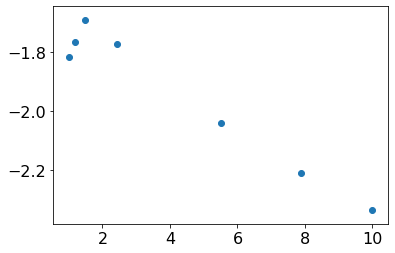

In [86]:
plt.figure()
plt.scatter(X, y[Y_IDX])

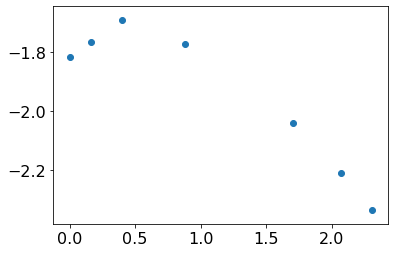

In [57]:
plt.figure()
plt.scatter(np.log(X), y[Y_IDX])

In [59]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

In [60]:
Y_scaler = StandardScaler()
Y_scaled = Y_scaler.fit_transform(y[Y_IDX].reshape(-1,1))

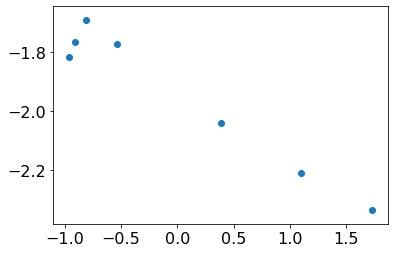

In [61]:
plt.figure()
plt.scatter(X_scaled, y[Y_IDX])

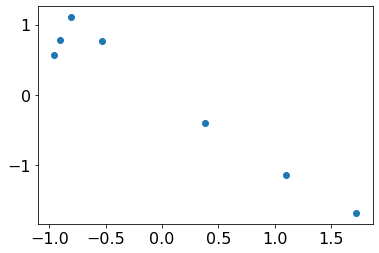

In [62]:
plt.figure()
plt.scatter(X_scaled, Y_scaled)

In [81]:
# log X then scale?
logX_scaler = StandardScaler()
logX_scaled = logX_scaler.fit_transform(np.log(X))

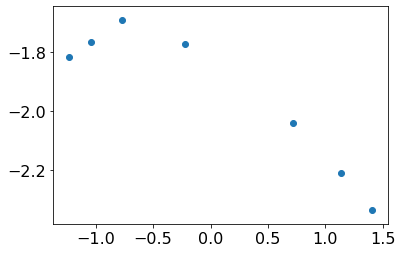

In [83]:
plt.figure()
plt.scatter(logX_scaled, y[Y_IDX])

# fits

In [63]:
from scrinet.fits import poly

In [64]:
?poly.findpolyfit

Signature:
poly.findpolyfit(
    X,
    y,
    max_degs,
    output_best=False,
    validation_data=None,
    method='sum-of-squares',
    verbose=True,
)
Docstring:
X, y data to fit
max_degs: max deg to try in each dim. e.g., if 2D X data then max_degs could be
    array([[0, 0],
        [1, 0],
        [2, 0],
        [0, 1],
        [1, 1],
        [0, 2]])
    In practice use fits.poly.generate_degrees([2,2])

returns a bunch of stuff included the prefereed degree
according to min([AIC, AICc, BIC])

if output_best=True
then you will simply get the best fit
File:      ~/work/git/stk/scrinet/scrinet/fits/poly.py
Type:      function


In [65]:
maxdegs=[5]
max_deg_total=5
max_degs = poly.generate_degrees(
    maxdegs=maxdegs, max_deg_total=max_deg_total)

In [66]:
lr, _ = poly.findpolyfit(
    X,
    y[Y_IDX],
    max_degs=max_degs,
    output_best=True,
    verbose=False
    )

In [67]:
lr_log, _ = poly.findpolyfit(
    np.log(X),
    y[Y_IDX],
    max_degs=max_degs,
    output_best=True,
    verbose=False
    )

In [68]:
lr_X_scale, _ = poly.findpolyfit(
    X_scaled,
    y[Y_IDX],
    max_degs=max_degs,
    output_best=True,
    verbose=False
    )

In [69]:
lr_XY_scale, _ = poly.findpolyfit(
    X_scaled,
    Y_scaled,
    max_degs=max_degs,
    output_best=True,
    verbose=False
    )

In [70]:
lr_XY_scale.predict(X_scaled)

array([[ 0.5437724 ],
       [-0.40317674],
       [-1.67905732],
       [ 1.08052828],
       [ 0.76472518],
       [ 0.82646012],
       [-1.13325192]])

In [71]:
lr_XY_inv_prediction = Y_scaler.inverse_transform(lr_XY_scale.predict(X_scaled)).reshape(-1)

In [88]:
lr_logX_scale, _ = poly.findpolyfit(
    logX_scaled,
    y[Y_IDX],
    max_degs=max_degs,
    output_best=True,
    verbose=False
    )

In [89]:
lr_logX_scale.predict(logX_scaled)

array([-1.82218221, -2.04437065, -2.33678828, -1.70615118, -1.76436251,
       -1.74918576, -2.20544366])

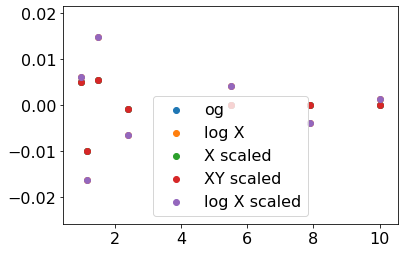

In [93]:
plt.figure()
plt.scatter(X, y[Y_IDX] - lr.predict(X), label='og')
plt.scatter(X, y[Y_IDX] - lr_log.predict(np.log(X)), label='log X')
plt.scatter(X, y[Y_IDX] - lr_X_scale.predict(X_scaled), label='X scaled')
plt.scatter(X, y[Y_IDX] - lr_XY_inv_prediction, label='XY scaled')
plt.scatter(X, y[Y_IDX] - lr_logX_scale.predict(logX_scaled), label='log X scaled')
plt.legend()

In [ ]:
# sometimes log scale works best, sometimes StandardScaler works best...